In [22]:
# Importing of the necessary libraries for data ingestion and machine learining

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import glob
import matplotlib.pyplot as plt
import os

# Load and Prepare Data

In [55]:
pores = pd.read_excel('Porosity & Aggregations.xlsx', sheet_name='Pores')
aggregation = pd.read_excel('Porosity & Aggregations.xlsx', sheet_name='Aggregations')
classification = pd.read_excel('class.xlsx', sheet_name='data')


In [61]:
pores_aggregations = classification.merge(pores, how='left', on='img_name', sort=False).sort_index()
aggregation_class = classification.merge(aggregation, how='left', on='img_name', sort=False).sort_index()

## Check the distribution of the area of pores and aggregations 
>Given the skewed distribution we can apply a Log transform to reduce it

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[Text(0.5, 0, '')]

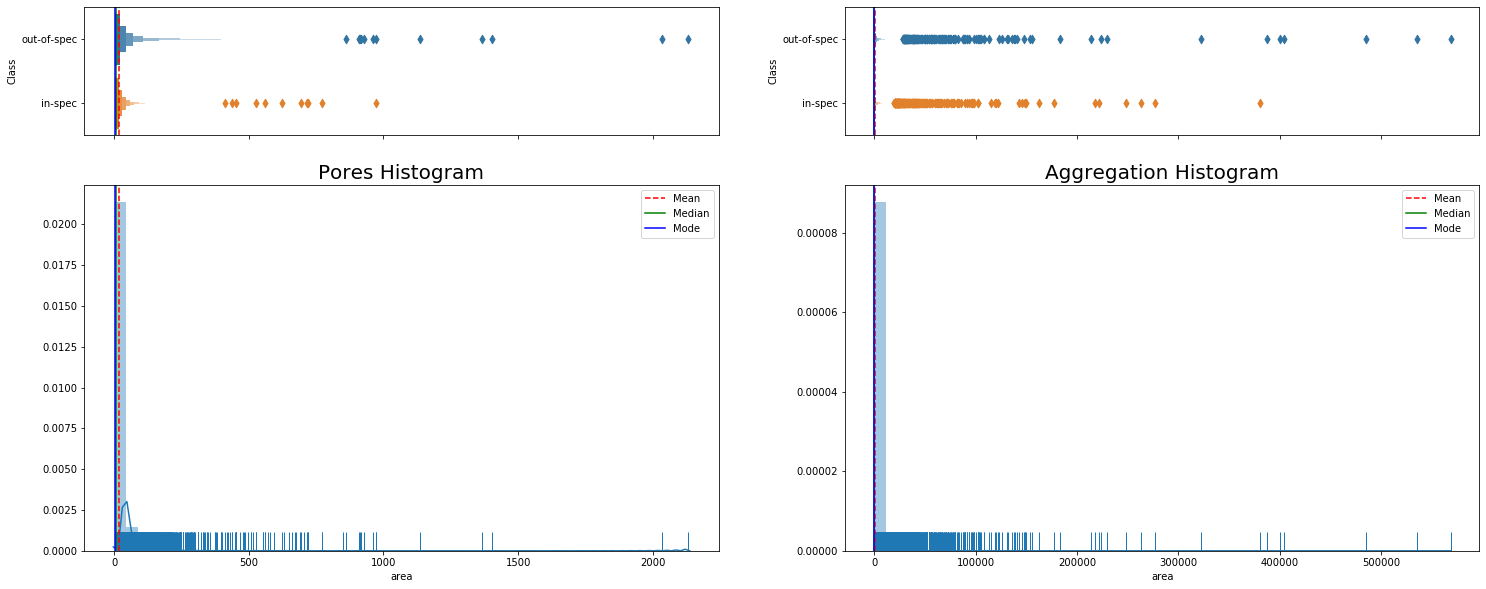

In [36]:
mean_pores = pores_class['area'].mean()
median_pores = pores_class['area'].median()
mode_pores = pores_class['area'].mode().get_values()[0]

mean_aggregation=aggregation_class['area'].mean()
median_aggregation=aggregation_class['area'].median()
mode_aggregation=aggregation_class['area'].mode().get_values()[0]


fig, (ax_box, ax_hist) = plt.subplots(2,2, sharex='col', gridspec_kw= {"height_ratios": (0.35, 1)}, figsize=(25, 10))

##### PORES ######
sns.boxenplot(x = pores_class['area'], y= pores_class['Class'], ax=ax_box[0])
ax_box[0].axvline(mean_pores, color='r', linestyle='--')
ax_box[0].axvline(median_pores, color='g', linestyle='-')
ax_box[0].axvline(mode_pores, color='b', linestyle='-')

ax_hist[0].set_title('Pores Histogram',fontsize=20 )
sns.distplot(pores_class['area'], rug=True, ax=ax_hist[0])
ax_hist[0].axvline(mean_pores, color='r', linestyle='--')
ax_hist[0].axvline(median_pores, color='g', linestyle='-')
ax_hist[0].axvline(mode_pores, color='b', linestyle='-')

ax_hist[0].legend({'Mean':mean_pores,'Median':median_pores,'Mode':mode_pores})

ax_box[0].set(xlabel='')

##### Aggregations ######
sns.boxenplot(x = aggregation_class['area'], y = aggregation_class['Class'], ax=ax_box[1])
ax_box[1].axvline(mean_aggregation, color='r', linestyle='--')
ax_box[1].axvline(median_aggregation, color='g', linestyle='-')
ax_box[1].axvline(mode_aggregation, color='b', linestyle='-')

ax_hist[1].set_title('Aggregation Histogram',fontsize=20 )
sns.distplot(aggregation_class['area'], rug=True, ax=ax_hist[1])
ax_hist[1].axvline(mean_aggregation, color='r', linestyle='--')
ax_hist[1].axvline(median_aggregation, color='g', linestyle='-')
ax_hist[1].axvline(mode_aggregation, color='b', linestyle='-')

ax_hist[1].legend({'Mean':mean_aggregation,'Median':median_aggregation,'Mode':mode_aggregation})

ax_box[1].set(xlabel='')

## Check the distribution of the area of the <b>log</b> of pores and aggregations 
> Log tranform helped with the distribution of the data but still there are many pores with really small dimentions that won't have an impact in the predictions

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[Text(0.5, 0, '')]

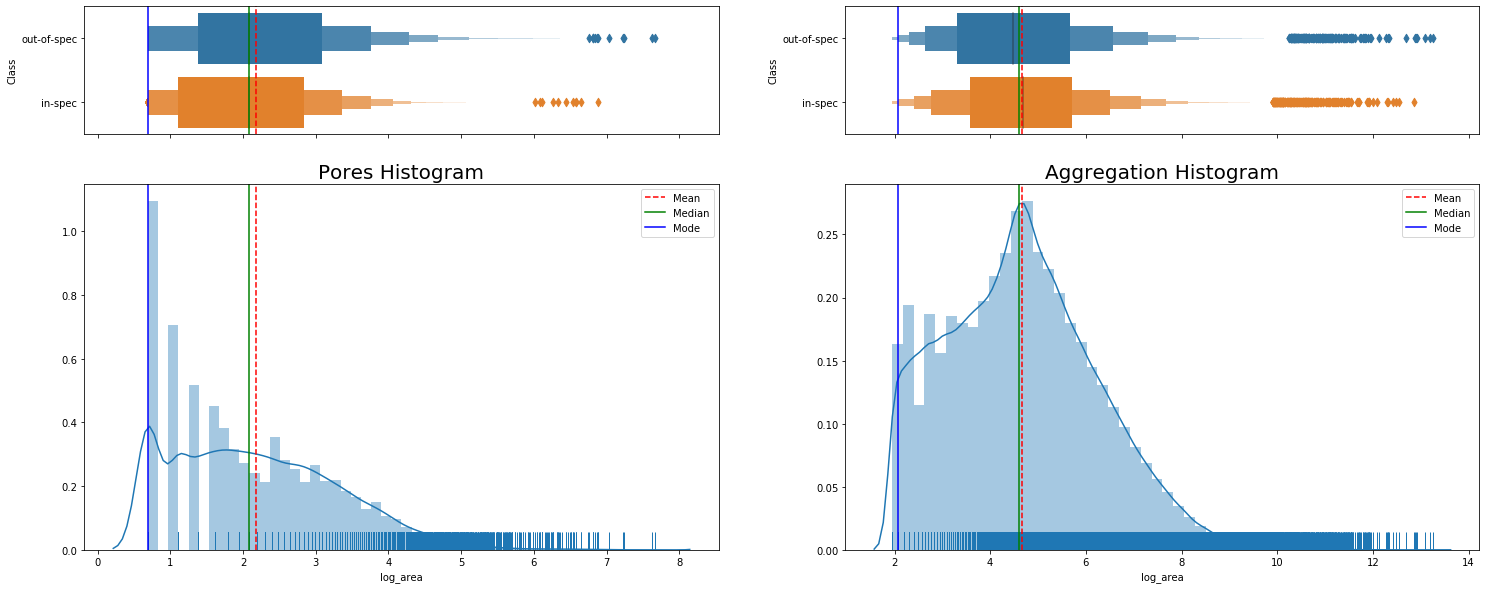

In [38]:
pores_class['log_area'] = np.log(pores_class['area'])
aggregation_class['log_area'] = np.log(aggregation_class['area'])


#We plot again with greater holes and aggregations
mean_pores = pores_class['log_area'].mean()
median_pores = pores_class['log_area'].median()
mode_pores = pores_class['log_area'].mode().get_values()[0]

mean_aggregation=aggregation_class['log_area'].mean()
median_aggregation=aggregation_class['log_area'].median()
mode_aggregation=aggregation_class['log_area'].mode().get_values()[0]


fig, (ax_box, ax_hist) = plt.subplots(2,2, sharex='col', gridspec_kw= {"height_ratios": (0.35, 1)}, figsize=(25, 10))

##### PORES ######
sns.boxenplot(x = pores_class['log_area'], y= pores_class['Class'], ax=ax_box[0])
ax_box[0].axvline(mean_pores, color='r', linestyle='--')
ax_box[0].axvline(median_pores, color='g', linestyle='-')
ax_box[0].axvline(mode_pores, color='b', linestyle='-')

ax_hist[0].set_title('Pores Histogram',fontsize=20 )
sns.distplot(pores_class['log_area'], rug=True, ax=ax_hist[0])
ax_hist[0].axvline(mean_pores, color='r', linestyle='--')
ax_hist[0].axvline(median_pores, color='g', linestyle='-')
ax_hist[0].axvline(mode_pores, color='b', linestyle='-')

ax_hist[0].legend({'Mean':mean_pores,'Median':median_pores,'Mode':mode_pores})

ax_box[0].set(xlabel='')

##### Aggregations ######
sns.boxenplot(x = aggregation_class['log_area'], y = aggregation_class['Class'], ax=ax_box[1])
ax_box[1].axvline(mean_aggregation, color='r', linestyle='--')
ax_box[1].axvline(median_aggregation, color='g', linestyle='-')
ax_box[1].axvline(mode_aggregation, color='b', linestyle='-')

ax_hist[1].set_title('Aggregation Histogram',fontsize=20 )
sns.distplot(aggregation_class['log_area'], rug=True, ax=ax_hist[1])
ax_hist[1].axvline(mean_aggregation, color='r', linestyle='--')
ax_hist[1].axvline(median_aggregation, color='g', linestyle='-')
ax_hist[1].axvline(mode_aggregation, color='b', linestyle='-')

ax_hist[1].legend({'Mean':mean_aggregation,'Median':median_aggregation,'Mode':mode_aggregation})

ax_box[1].set(xlabel='')

## We introduce on the size of Pores and Aggregations

In [67]:
# We filter pores smaller than 12 and aggregation smaler than 20
# This removes really tiny pores and aggregation that don't have an impact in the quality of the cast-leaf
pores = pores[pores['area']>=12]
pores_class = pores_class[pores_class['area']>=12]

aggregation = aggregation[aggregation['area']>=20]
aggregation_class = aggregation_class[aggregation_class['area']>=20]
#We also remove really big holes and aggregations to be considered outliers
pores = pores[pores['area']<=1000]
pores_class = pores_class[pores_class['area']<=1000]


aggregation = aggregation[aggregation['area']<=15000]
aggregation_class = aggregation_class[aggregation_class['area']<=15000]


## We plot again the Holes and Aggregation Histogram (with filter)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[Text(0.5, 0, '')]

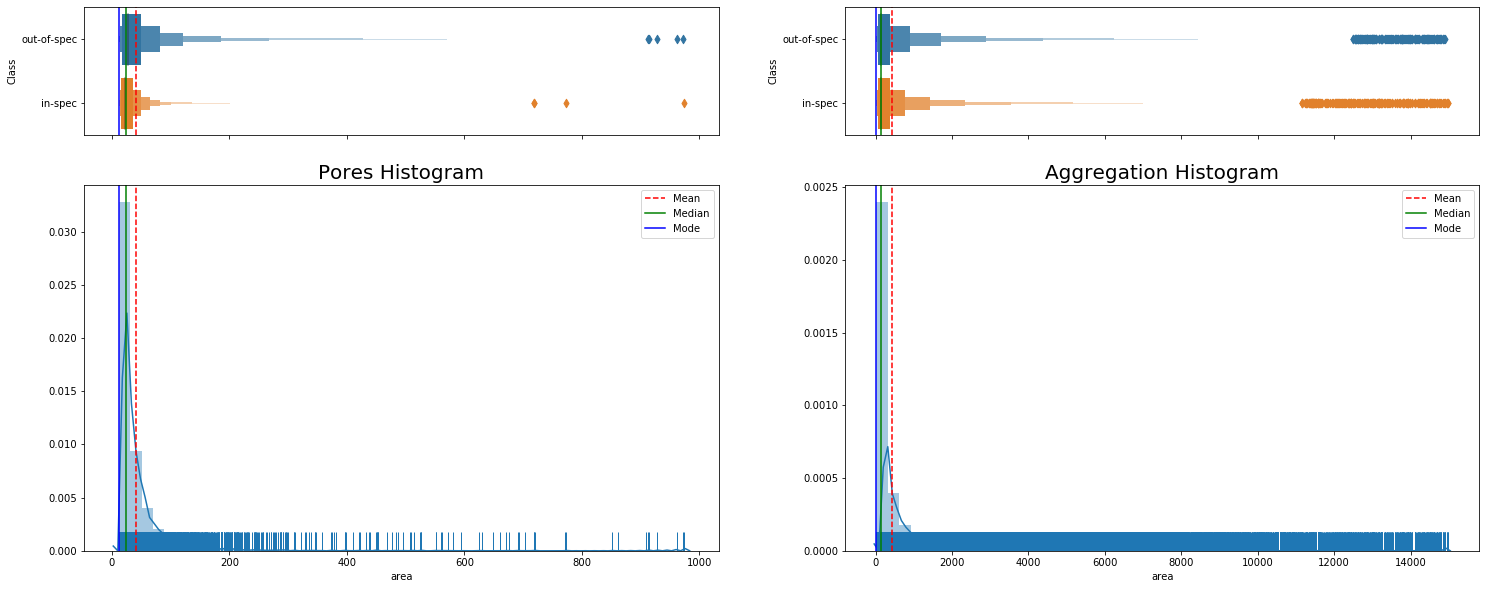

In [43]:
#We plot again with greater holes and aggregations
mean_pores = pores_class['area'].mean()
median_pores = pores_class['area'].median()
mode_pores = pores_class['area'].mode().get_values()[0]

mean_aggregation=aggregation_class['area'].mean()
median_aggregation=aggregation_class['area'].median()
mode_aggregation=aggregation_class['area'].mode().get_values()[0]


fig, (ax_box, ax_hist) = plt.subplots(2,2, sharex='col', gridspec_kw= {"height_ratios": (0.35, 1)}, figsize=(25, 10))

##### PORES ######
sns.boxenplot(x = pores_class['area'], y= pores_class['Class'], ax=ax_box[0])
ax_box[0].axvline(mean_pores, color='r', linestyle='--')
ax_box[0].axvline(median_pores, color='g', linestyle='-')
ax_box[0].axvline(mode_pores, color='b', linestyle='-')

ax_hist[0].set_title('Pores Histogram',fontsize=20 )
sns.distplot(pores_class['area'], rug=True, ax=ax_hist[0])
ax_hist[0].axvline(mean_pores, color='r', linestyle='--')
ax_hist[0].axvline(median_pores, color='g', linestyle='-')
ax_hist[0].axvline(mode_pores, color='b', linestyle='-')

ax_hist[0].legend({'Mean':mean_pores,'Median':median_pores,'Mode':mode_pores})

ax_box[0].set(xlabel='')

##### Aggregations ######
sns.boxenplot(x = aggregation_class['area'], y = aggregation_class['Class'], ax=ax_box[1])
ax_box[1].axvline(mean_aggregation, color='r', linestyle='--')
ax_box[1].axvline(median_aggregation, color='g', linestyle='-')
ax_box[1].axvline(mode_aggregation, color='b', linestyle='-')

ax_hist[1].set_title('Aggregation Histogram',fontsize=20 )
sns.distplot(aggregation_class['area'], rug=True, ax=ax_hist[1])
ax_hist[1].axvline(mean_aggregation, color='r', linestyle='--')
ax_hist[1].axvline(median_aggregation, color='g', linestyle='-')
ax_hist[1].axvline(mode_aggregation, color='b', linestyle='-')

ax_hist[1].legend({'Mean':mean_aggregation,'Median':median_aggregation,'Mode':mode_aggregation})

ax_box[1].set(xlabel='')

## We plot again the <b>log</b> of Holes and Aggregation Histogram (with filter)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[Text(0.5, 0, '')]

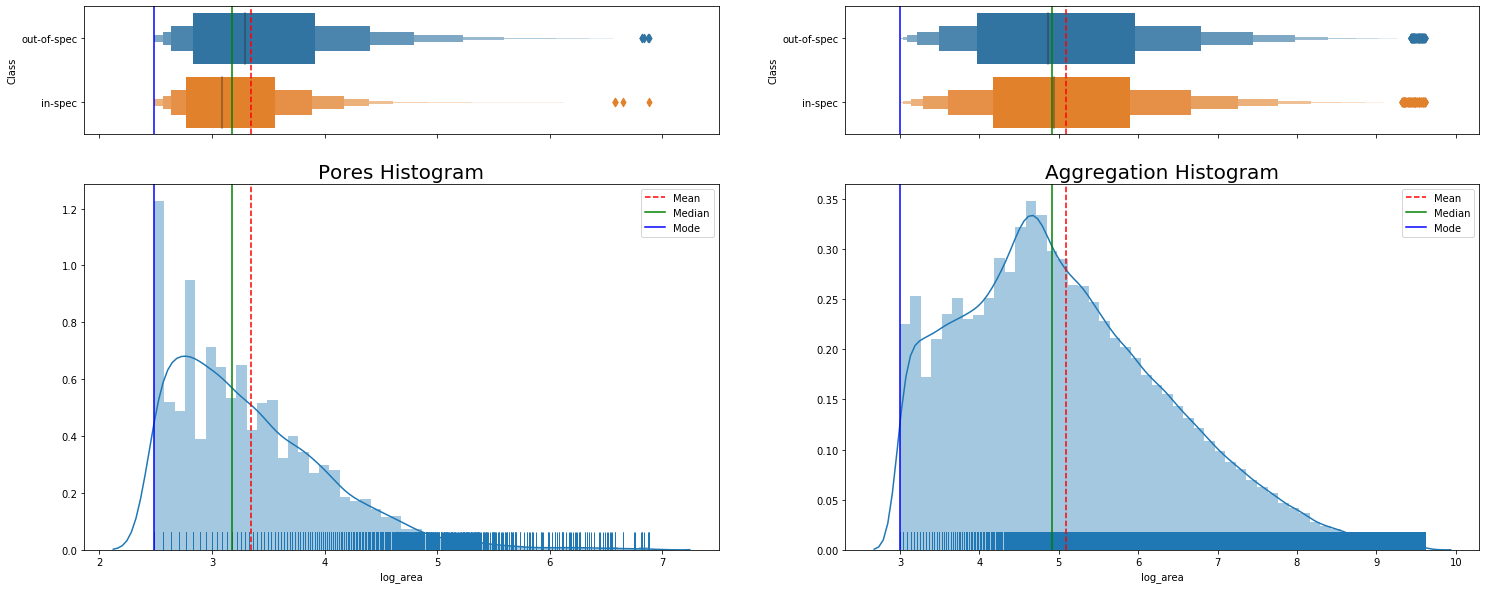

In [44]:
pores_class['log_area'] = np.log(pores_class['area'])
aggregation_class['log_area'] = np.log(aggregation_class['area'])


#We plot again with greater holes and aggregations
mean_pores = pores_class['log_area'].mean()
median_pores = pores_class['log_area'].median()
mode_pores = pores_class['log_area'].mode().get_values()[0]

mean_aggregation=aggregation_class['log_area'].mean()
median_aggregation=aggregation_class['log_area'].median()
mode_aggregation=aggregation_class['log_area'].mode().get_values()[0]


fig, (ax_box, ax_hist) = plt.subplots(2,2, sharex='col', gridspec_kw= {"height_ratios": (0.35, 1)}, figsize=(25, 10))

##### PORES ######
sns.boxenplot(x = pores_class['log_area'], y= pores_class['Class'], ax=ax_box[0])
ax_box[0].axvline(mean_pores, color='r', linestyle='--')
ax_box[0].axvline(median_pores, color='g', linestyle='-')
ax_box[0].axvline(mode_pores, color='b', linestyle='-')

ax_hist[0].set_title('Pores Histogram',fontsize=20 )
sns.distplot(pores_class['log_area'], rug=True, ax=ax_hist[0])
ax_hist[0].axvline(mean_pores, color='r', linestyle='--')
ax_hist[0].axvline(median_pores, color='g', linestyle='-')
ax_hist[0].axvline(mode_pores, color='b', linestyle='-')

ax_hist[0].legend({'Mean':mean_pores,'Median':median_pores,'Mode':mode_pores})

ax_box[0].set(xlabel='')

##### Aggregations ######
sns.boxenplot(x = aggregation_class['log_area'], y = aggregation_class['Class'], ax=ax_box[1])
ax_box[1].axvline(mean_aggregation, color='r', linestyle='--')
ax_box[1].axvline(median_aggregation, color='g', linestyle='-')
ax_box[1].axvline(mode_aggregation, color='b', linestyle='-')

ax_hist[1].set_title('Aggregation Histogram',fontsize=20 )
sns.distplot(aggregation_class['log_area'], rug=True, ax=ax_hist[1])
ax_hist[1].axvline(mean_aggregation, color='r', linestyle='--')
ax_hist[1].axvline(median_aggregation, color='g', linestyle='-')
ax_hist[1].axvline(mode_aggregation, color='b', linestyle='-')

ax_hist[1].legend({'Mean':mean_aggregation,'Median':median_aggregation,'Mode':mode_aggregation})

ax_box[1].set(xlabel='')

## Get the median of pores and aggregation per image
>Please refere bellow to see that the rgb channel has an pattern with the classification

In [74]:
pores['log_area'] = np.log(pores['area'])
aggregation['log_area'] = np.log(aggregation['area'])

median_pores = pores.groupby(by='img_name',axis= 0).agg(
n_pores=pd.NamedAgg('area', aggfunc='count'),
median_pores=pd.NamedAgg('area', aggfunc='median'),
median_log_pores=pd.NamedAgg('log_area', aggfunc='median')
).reset_index()

In [75]:
median_aggregation = aggregation.groupby(by='img_name',axis= 0).agg(
n_agg=pd.NamedAgg('area', aggfunc='count'),
median_agg=pd.NamedAgg('area', aggfunc='median'),
median_log_agg=pd.NamedAgg('log_area', aggfunc='median')

).reset_index()

In [669]:
# writer = pd.ExcelWriter('medians.xlsx')
# median_pores.to_excel(writer,'pores', index=False)
# median_aggregation.to_excel(writer,'aggregations', index=False)
# writer.save()

## Get the mean color of the image

In [25]:
from sklearn.cluster import KMeans
from PIL import Image

jpgfiles = []
for file in glob.glob("images/*.jpg"):
    jpgfiles.append(file)

rgb_df = pd.DataFrame(columns=['img_name','r','g','b'])
    
for image in jpgfiles:
    
    img = Image.open(image)
    
    img_array = np.array(img)
    X = img_array.reshape(-1, 3)
    
    kmeans_img = KMeans(
            n_clusters=1,
            random_state=0 
        )
        # Fit it to the data
    kmeans_img.fit(X, y=None)

    centroids = kmeans_img.cluster_centers_
    centroids_int = kmeans_img.cluster_centers_.astype(int)
    
    
    r = centroids_int[0][0]
    g = centroids_int[0][1]
    b = centroids_int[0][2]
    rgb_df = rgb_df.append(pd.Series([os.path.basename(image),r,g,b], index=rgb_df.columns ) , ignore_index=True)


## Prepare the final DataSet & Save

In [27]:
df_temp = classification.merge(median_pores, how='left', on='img_name', sort=False).sort_index()
df_temp = df_temp.merge(median_aggregation, how='left', on='img_name', sort=False).sort_index()

df_final = df_temp.merge(rgb_df, how='left', on='img_name', sort=False).sort_index()
#Our filtering removed imaged that had small holes. We fill them with 0
df_final = df_final.fillna(value=0)

In [84]:
df_final

,Class,img_name,n_pores,median_pores,median_log_pores,n_agg,median_agg,median_log_agg,r,g,b
0,out-of-spec,TC-S1X-101941248-L8-P7-img3-2800.jpg,39,45.0,3.806662,194,148.0,4.997189,103,35,6
1,out-of-spec,TC-S1X-101941248-L8-P7-img2-2800.jpg,28,32.5,3.481122,231,187.0,5.231109,104,35,6
2,out-of-spec,TC-S1X-101941248-L8-P7-img1-2800.jpg,26,26.0,3.258097,210,155.0,5.043342,100,33,5
3,out-of-spec,TC-S1X-101941248-L7-P7-img3-2800.jpg,29,37.0,3.610918,229,197.0,5.283204,106,36,6
4,out-of-spec,TC-S1X-101941248-L7-P7-img2-2800.jpg,24,24.0,3.174569,238,143.5,4.966280,102,34,6
...,...,...,...,...,...,...,...,...,...,...,...
484,out-of-spec,DL-D2-HT3539762-L2-P7-img2-2800.jpg,1,36.0,3.583519,906,122.0,4.804021,102,31,5
485,out-of-spec,DL-D2-HT3539762-L2-P7-img1-2800.jpg,3,14.0,2.639057,867,106.0,4.663439,102,31,5
486,in-spec,DL-D2-HT3539762-L1-P7-img3-2800.jpg,1,14.0,2.639057,1013,97.0,4.574711,97,29,4
487,out-of-spec,DL-D2-HT3539762-L1-P7-img2-2800.jpg,4,24.5,3.193440,895,112.0,4.718499,100,31,4


In [ ]:
writer = pd.ExcelWriter('Final Dataset.xlsx')
df_final.to_excel(writer,'data', index=False)
writer.save()

## Plot the distribution of the median log size of the pores and aggregations for all images

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[Text(0.5, 0, '')]

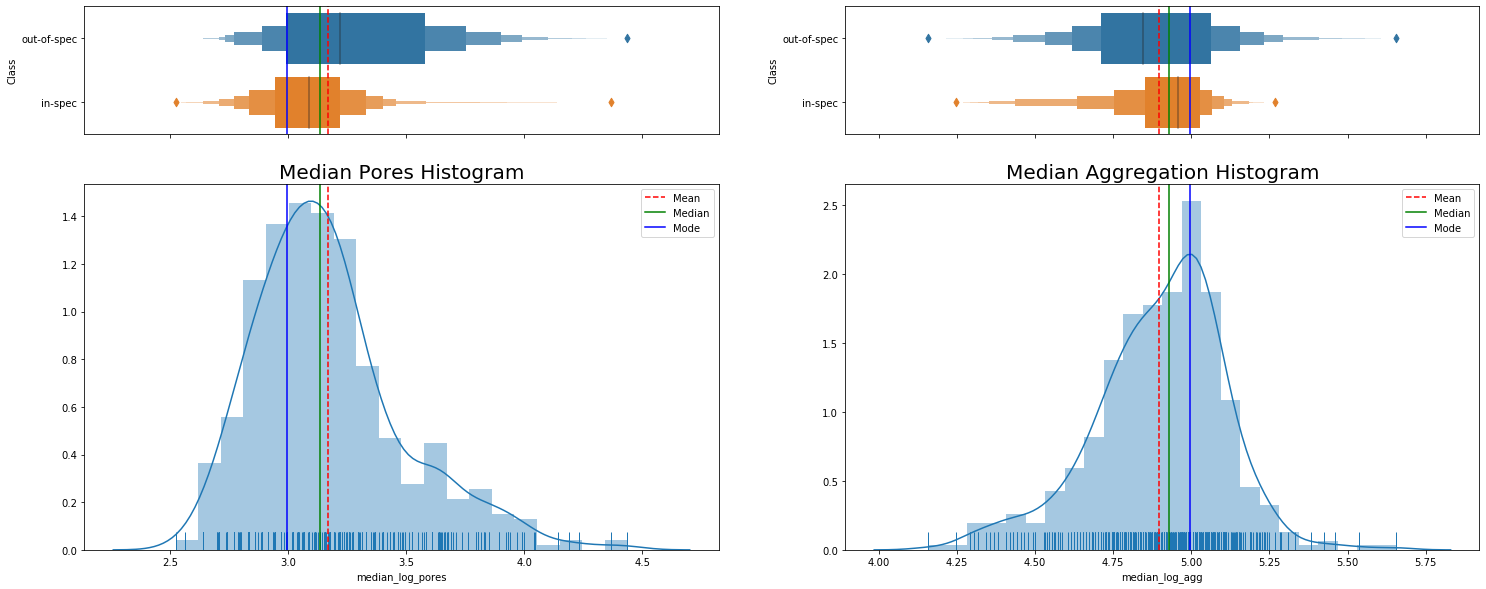

In [79]:
#We plot again with greater holes and aggregations
mean_pores_ = df_final['median_log_pores'].mean()
median_pores_ = df_final['median_log_pores'].median()
mode_pores_ = df_final['median_log_pores'].mode().get_values()[0]

mean_aggregation_ = df_final['median_log_agg'].mean()
median_aggregation_ = df_final['median_log_agg'].median()
mode_aggregation_ = df_final['median_log_agg'].mode().get_values()[0]


fig, (ax_box, ax_hist) = plt.subplots(2,2, sharex='col', gridspec_kw= {"height_ratios": (0.35, 1)}, figsize=(25, 10))

##### PORES ######
sns.boxenplot(x = df_final['median_log_pores'], y= df_final['Class'], ax=ax_box[0])
ax_box[0].axvline(mean_pores_, color='r', linestyle='--')
ax_box[0].axvline(median_pores_, color='g', linestyle='-')
ax_box[0].axvline(mode_pores_, color='b', linestyle='-')

ax_hist[0].set_title('Median Pores Histogram',fontsize=20 )
sns.distplot(df_final['median_log_pores'], rug=True, ax=ax_hist[0])
ax_hist[0].axvline(mean_pores_, color='r', linestyle='--')
ax_hist[0].axvline(median_pores_, color='g', linestyle='-')
ax_hist[0].axvline(mode_pores_, color='b', linestyle='-')

ax_hist[0].legend({'Mean':mean_pores_,'Median':median_pores_,'Mode':mode_pores_})

ax_box[0].set(xlabel='')

##### Aggregations ######
sns.boxenplot(x = df_final['median_log_agg'], y = df_final['Class'], ax=ax_box[1])
ax_box[1].axvline(mean_aggregation_, color='r', linestyle='--')
ax_box[1].axvline(median_aggregation_, color='g', linestyle='-')
ax_box[1].axvline(mode_aggregation_, color='b', linestyle='-')

ax_hist[1].set_title('Median Aggregation Histogram',fontsize=20 )
sns.distplot(df_final['median_log_agg'], rug=True, ax=ax_hist[1])
ax_hist[1].axvline(mean_aggregation_, color='r', linestyle='--')
ax_hist[1].axvline(median_aggregation_, color='g', linestyle='-')
ax_hist[1].axvline(mode_aggregation_, color='b', linestyle='-')

ax_hist[1].legend({'Mean':mean_aggregation_,'Median':median_aggregation_,'Mode':mode_aggregation_})

ax_box[1].set(xlabel='')

## t-SNE transformation to understand if the rgb channels have an impact in the classificaiotn
> We can see from the plot that the rgb channels seemt to be separated according to the classification for the cast leaf

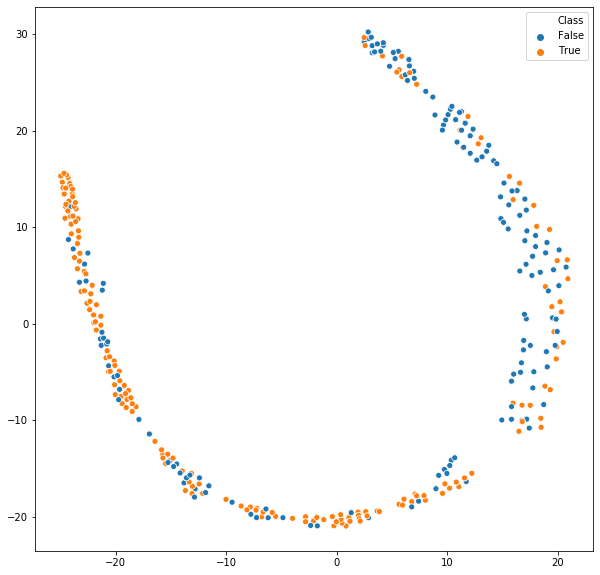

In [82]:
import seaborn as sns
from sklearn.manifold import TSNE

#&nbsp;Use t-SNE to restructre dataset
tsne = TSNE(n_components=2)
X = df_final[['r', 'g', 'b']]
X_tnse = tsne.fit_transform(X)

# Plot first two TSNE components
plt.figure(figsize=(10, 10))
label_train = df_final.Class=='in-spec'
sns.scatterplot(X_tnse[:, 0], X_tnse[:, 1], hue=label_train);